<h1>Análisis exploratorio con técnicas de agrupamiento</h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3006C.102 | Inteligencia artificial avanzada para la ciencia de datos I

8 de septiembre de 2023

In [1]:
# Importar librerías y módulos
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from minisom import MiniSom

# Problema

In [2]:
# Importar el conjunto de datos
cd_df = pd.read_csv('/content/drive/MyDrive/z. Aprendizaje/country_data.csv')
cd_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.


In [3]:
# Matriz de las variables predictoras
points = cd_df.drop(['country'], axis=1)

# Generar un modelo de agrupamiento
kmeans = KMeans(n_clusters=10, n_init='auto').fit(points)

# Imprimir etiquetas y centros calculadas por el modelo
print('Labels:', kmeans.labels_)
print('Centers:', kmeans.cluster_centers_)

Labels: [3 0 0 3 4 4 3 9 9 0 6 6 3 4 0 1 0 3 3 3 0 0 4 5 0 3 3 3 3 9 3 3 3 4 0 0 3
 3 3 0 3 4 6 6 9 0 0 0 0 6 3 4 0 1 1 4 3 3 1 3 6 0 3 3 3 3 3 4 1 3 0 4 0 9
 6 1 0 1 0 4 3 3 5 3 3 4 4 3 3 4 4 2 0 3 3 4 0 3 6 3 4 3 3 0 0 3 3 3 0 3 9
 1 3 3 8 6 3 4 0 0 3 4 6 7 4 4 3 3 6 3 0 4 3 5 4 6 3 0 6 6 0 0 3 0 9 8 3 3
 0 3 3 3 0 4 0 3 0 9 1 9 4 3 3 4 3 3 3]
Centers: [[2.31945946e+01 4.01513514e+01 6.41756757e+00 4.51081081e+01
  1.07508108e+04 7.87324324e+00 7.20324324e+01 2.32864865e+00
  5.00891892e+03]
 [4.12222222e+00 3.73666667e+01 1.01455556e+01 3.55777778e+01
  3.75000000e+04 1.46977778e+00 8.10222222e+01 1.81000000e+00
  4.08666667e+04]
 [2.80000000e+00 1.75000000e+02 7.77000000e+00 1.42000000e+02
  9.17000000e+04 3.62000000e+00 8.13000000e+01 1.63000000e+00
  1.05000000e+05]
 [7.44707692e+01 2.85599846e+01 6.24676923e+00 4.61302446e+01
  3.02281538e+03 1.01210154e+01 6.27907692e+01 4.31600000e+00
  1.38760000e+03]
 [1.41192308e+01 4.80307692e+01 6.42346154e+00 4.65576923e+01
  1.93307692e

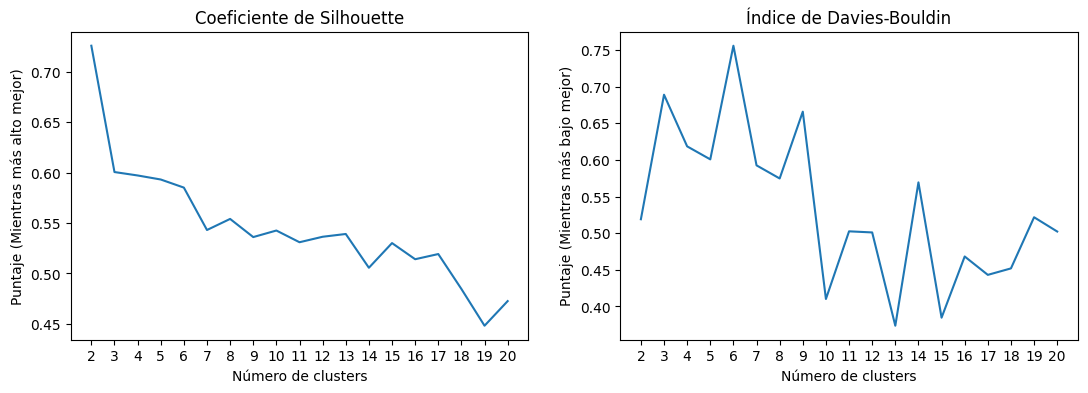

In [4]:
# Función para graficar los resultados de los métodos de estimación
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
    plt.show()

# Arreglo de valores propuestos para el número de grupos
ks = np.arange(2, 21)

# Arreglos para guardar las evaluaciones de número de grupos
sscore = []
dbscore = []

# Por cada número de grupos propuesto
for k in ks:
    # Generar un modelo de agrupamiento con el número de grupos propuesto
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(points)
    # Calcular el valor del coeficiente de Silhouette y añadir al arreglo correspondiente
    sscore.append(silhouette_score(points, kmeans.labels_))
    # Calcular el índice de Davies-Bouldin y añadir al arreglo correspondiente
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

# Graficar los resultados de cada método
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

# Generar gráfico del coeficiente de Silhouette
axs[0].plot(ks, sscore)
axs[0].set_xlabel('Número de clusters')
axs[0].set_ylabel('Puntaje (Mientras más alto mejor)')
axs[0].set_title('Coeficiente de Silhouette')
axs[0].set_xticks(ks)

# Generar gráfico del índice de Davies-Bouldin
axs[1].plot(ks, dbscore)
axs[1].set_xlabel('Número de clusters')
axs[1].set_ylabel('Puntaje (Mientras más bajo mejor)')
axs[1].set_title('Índice de Davies-Bouldin')
axs[1].set_xticks(ks)

# Mostrar los gráficos generados
plt.show()

Al ver ambos métodos de estimación del número óptimo de grupos, se puede apreciar que el valor óptimo sería 2. Lo anterior considerando que en ese número se da la mejor mezcla de puntajes.

In [5]:
# Generar un modelo de agrupamiento
kmeans = KMeans(n_clusters=2, n_init='auto').fit(points)

# Imprimir etiquetas y centros calculadas por el modelo
print('Labels:', kmeans.labels_)
print('Centers:', kmeans.cluster_centers_)

Labels: [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Centers: [[4.60155556e+01 3.75866593e+01 6.42029630e+00 4.69923400e+01
  9.60268889e+03 8.71334815e+00 6.82940741e+01 3.19881481e+00
  5.34899259e+03]
 [5.59375000e+00 5.59687500e+01 8.48375000e+00 4.64593750e+01
  4.89625000e+04 3.85200000e+00 8.00968750e+01 1.88968750e+00
  4.50906250e+04]]


In [6]:
km_cd_df = cd_df
km_cd_df['labels'] = kmeans.labels_
km_cd_df.sort_values(by=['labels'], ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,0
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,0
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630,0
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,0
...,...,...,...,...,...,...,...,...,...,...,...
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,1
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1


# 2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

In [7]:
# AGLOMERATIVE CLUSTERING
print('AGLOMERATIVE CLUSTERING')

# Generar un modelo de agrupamiento
agl = AgglomerativeClustering(n_clusters=10).fit(points)

# Imprimir etiquetas calculadas por el modelo
print('Labels:', agl.labels_)

AGLOMERATIVE CLUSTERING
Labels: [7 9 2 9 6 6 9 1 1 2 0 0 7 6 2 1 9 7 9 9 9 2 6 4 2 7 7 7 7 1 9 7 7 6 9 2 7
 7 9 2 7 6 0 0 1 2 9 9 9 0 7 6 9 1 1 2 7 9 1 7 0 2 9 7 7 9 7 6 1 7 9 2 2 1
 0 1 9 1 9 6 7 7 4 7 7 6 2 7 7 0 6 8 2 7 7 6 2 7 0 7 2 7 7 9 2 9 7 7 9 7 1
 0 7 9 3 0 7 2 9 9 9 6 0 5 2 6 7 9 0 7 2 6 7 4 6 0 7 2 0 0 9 2 7 2 1 3 7 7
 2 7 7 9 9 6 9 7 9 4 1 1 6 7 7 6 7 7 7]


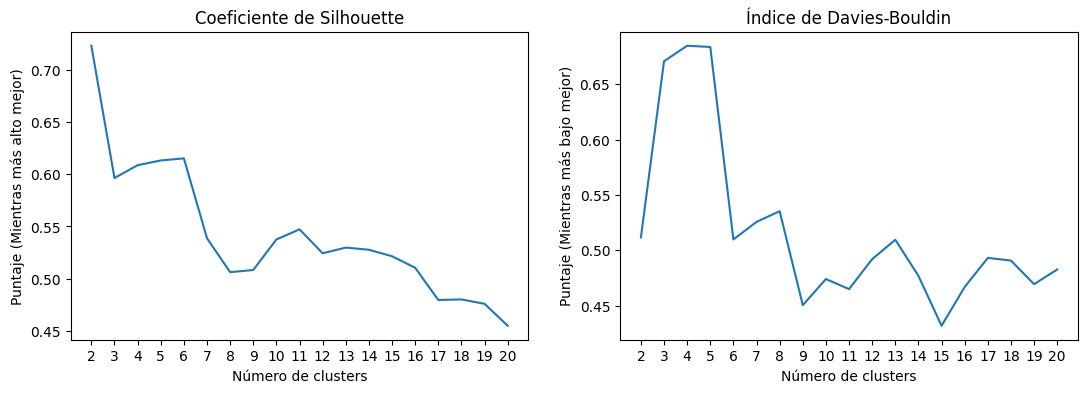

In [8]:
# Arreglo de valores propuestos para el número de grupos
ns = np.arange(2, 21)

# Arreglos para guardar las evaluaciones de número de grupos
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

# Por cada número de grupos propuesto
for n in ns:
    # Generar un modelo de agrupamiento con el número de grupos propuesto
    agl = AgglomerativeClustering(n_clusters=n).fit(points)
    # Calcular el valor del coeficiente de Silhouette y añadir al arreglo correspondiente
    sscore.append(silhouette_score(points, agl.labels_))
    # Calcular el índice de Davies-Bouldin y añadir al arreglo correspondiente
    dbscore.append(davies_bouldin_score(points, agl.labels_))

# Graficar los resultados de cada método
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

# Generar gráfico del coeficiente de Silhouette
axs[0].plot(ks, sscore)
axs[0].set_xlabel('Número de clusters')
axs[0].set_ylabel('Puntaje (Mientras más alto mejor)')
axs[0].set_title('Coeficiente de Silhouette')
axs[0].set_xticks(ks)

# Generar gráfico del índice de Davies-Bouldin
axs[1].plot(ks, dbscore)
axs[1].set_xlabel('Número de clusters')
axs[1].set_ylabel('Puntaje (Mientras más bajo mejor)')
axs[1].set_title('Índice de Davies-Bouldin')
axs[1].set_xticks(ks)

# Mostrar los gráficos generados
plt.show()

Al ver ambos métodos de estimación del número óptimo de grupos, se puede apreciar que el valor óptimo sería 2. Lo anterior considerando que en ese número se da la mejor mezcla de puntajes.

In [9]:
# Generar un modelo de agrupamiento
agl = AgglomerativeClustering(n_clusters=2).fit(points)

# Imprimir etiquetas calculadas por el modelo
print('Labels:', agl.labels_)

Labels: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [10]:
ac_cd_df = cd_df
ac_cd_df['labels'] = agl.labels_
ac_cd_df.sort_values(by=['labels'], ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630,0
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,0
104,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,0
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,0
...,...,...,...,...,...,...,...,...,...,...,...
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1


# 3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

Para la implementación de un mapa de autoorganización se eligió la libraría MINISOM. Para determinar el número óptimo de grupos se implementó un dendograma para calcular el número óptimo de grupos y utilizarlo para el mapa.

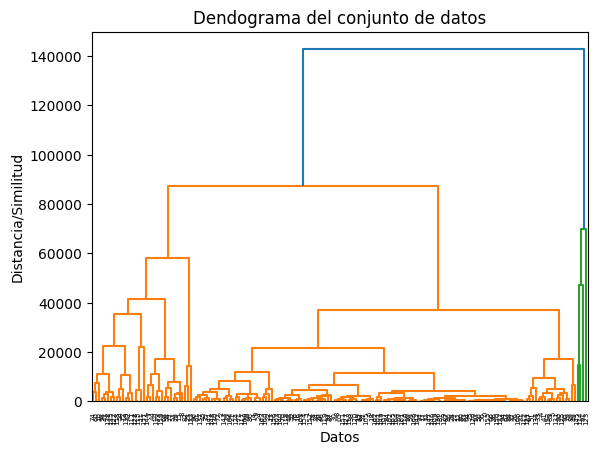

In [11]:
# DENDOGRAMA

# Agrupamiento jerárquico en los puntos de datos almacenados
linked = linkage(points, 'complete')

# Lista de posibles etiquetas para el dendograma
labelList = range(1, 21)

# Generar y mostrar el dendograma
plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma del conjunto de datos')
plt.xlabel('Datos')
plt.ylabel('Distancia/Similitud')
plt.show()

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 2.296152218760792


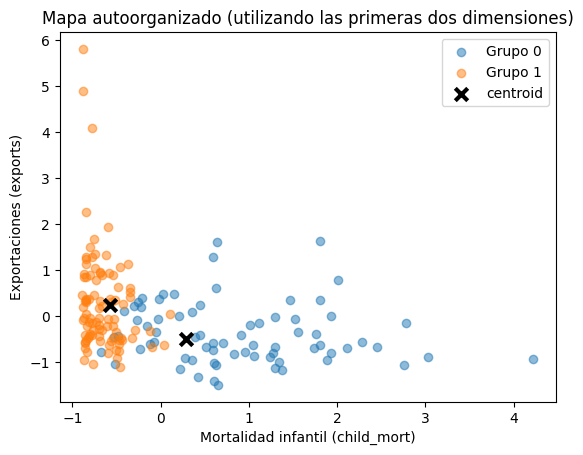

In [12]:
# MAPA AUTOORGANIZADO

# Convertir los datos a un arreglo de numpy
points = points.to_numpy()

# Normalización de los datos normalization
points = (points - np.mean(points, axis=0)) / np.std(points, axis=0)

# Definir el número de clases (SOM grid)
som_shape = (1, 2)

# Inicialización del mapa autoorganizado
som = MiniSom(som_shape[0], som_shape[1], points.shape[1], sigma=.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=10)

# Entrenamiento del mapa autoorganizado
som.train_batch(points, 500, verbose=True)

# Encontrar las coordenadas de cada dato dentro del SOM grid
winner_coordinates = np.array([som.winner(x) for x in points]).T

# Asignar cada dato al índice de grupo ganador
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Graficar los datos de cada grupos utilizando sus primeras dos dimensiones
for c in np.unique(cluster_index):
    plt.scatter(points[cluster_index == c, 0], points[cluster_index == c, 1], label='Grupo '+str(c), alpha=0.5)

# Graficar los centroides de cada grupo
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=80, linewidths=3, color='k', label='centroid')

# Añadir leyenda, título y ejes
plt.legend();
plt.title('Mapa autoorganizado (utilizando las primeras dos dimensiones)');
plt.xlabel('Mortalidad infantil (child_mort)');
plt.ylabel('Exportaciones (exports)');

In [13]:
som_cd_df = cd_df
som_cd_df['labels'] = cluster_index
som_cd_df.sort_values(by=['labels'], ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,0
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.900,68.2,4.98,1200,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,0
94,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,0
...,...,...,...,...,...,...,...,...,...,...,...
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,1
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300,1
34,China,15.7,26.3,5.07,22.6,9530,6.940,74.6,1.59,4560,1
96,Maldives,13.2,77.6,6.33,65.4,10500,2.880,77.9,2.23,7100,1


# 4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Tras analizar los resultados de cada método de agrupamiento al identificar los países que forman parte de cada grupo, se puede concluir que los grupos formados solo siguen un patrón esperado cuando se usan el número óptimo de grupos. Ya que el número óptimo de grupos puede ser dos o tres dependiendo del método de agrupamiento, a grandes razgos las clases pueden utilizarse para indicar las siguientes características:

Dos grupos:

0.    Países subdesarrollados
1.    Países desarrollados

Tres grupos:

0.    Países de desarrollo mínimo
1.    Países en vía de desarrollo
2.    Países de desarrollo avanzado

Al utilizar números de grupos mayores no optimizados, es más complicado identificar que los grupos formulados siguen un patrón esperado.

In [14]:
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [15]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/z. Aprendizaje/A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento.ipynb' --output-dir='/content/drive/MyDrive/z. Aprendizaje'

[NbConvertApp] Converting notebook /content/drive/MyDrive/z. Aprendizaje/A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento.ipynb to pdf
[NbConvertApp] Support files will be in A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento_files/
[NbConvertApp] Making directory ./A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento_files
[NbConvertApp] Making directory ./A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento_files
[NbConvertApp] Making directory ./A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento_files
[NbConvertApp] Making directory ./A01639224_AnalisisExploratorioConTecnicasDeAgrupamiento_files
[NbConvertApp] Writing 59498 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 